# Engineering College ROI & Placement Analytics 

## Business Problem

### Scenario

Ravi is a Class 12 student who wants to pursue engineering.  
He searches online and finds **thousands of engineering colleges** with different:

- Tuition fees  
- Placement packages  
- Rankings  
- Locations  
- Student ratings  

Some colleges charge **₹2 lakhs**, while others charge more than **₹15 lakhs**,  
but many of them offer **similar placement opportunities**.

Ravi starts asking questions:

- Is paying higher fees really worth it?  
- Do top-ranked colleges always give better placements?  
- Which states or cities offer better value-for-money colleges?  
- Are there affordable colleges with strong placement records?  

Like Ravi, **millions of students and parents** struggle every year to make informed college decisions due to the lack of **clear, data-driven comparisons**.


## Business Problem Statement

Students and parents face difficulty in selecting engineering colleges because:

- Fee structures vary widely  
- Placement outcomes are inconsistent  
- Rankings do not always reflect value for money  

There is a strong need for **data-driven analysis** to evaluate colleges based on:

- Fees vs placement outcomes  
- Return on Investment (ROI)  
- Location-wise performance  
- Rating vs real outcomes  

so that students can make **cost-effective and career-oriented decisions**.

## Project Objective

The objective of this project is to perform **Exploratory Data Analysis (EDA)** on engineering college data scraped from online platforms in order to:

- Analyze the relationship between fees and placement packages  
- Identify colleges offering **high ROI (best value for money)**  
- Compare performance across locations and rankings  
- Highlight trends that help students choose colleges wisely  


In [6]:
import selenium
from selenium import webdriver                           # webdriver to create a bridge b/w chrome and jupyter
from selenium.webdriver.chrome.service import Service    # if we want some service from chrome like install driver manager
from selenium.webdriver.chrome.options import Options    # options like disable notification
from selenium.webdriver.common.by import By              # used to find the element
from selenium.webdriver.common.keys import Keys          # keys is used to search something/ clicks
from webdriver_manager.chrome import ChromeDriverManager # install driver module which connects with browser
import time
import time
import re
import pandas as pd

In [7]:
options=Options()
options.add_argument('--start-maximized')

service=Service(ChromeDriverManager().install())

driver=webdriver.Chrome(service=service,options=options)

In [8]:
url = 'https://www.collegesearch.in/engineering-colleges-india'
driver.get(url)

In [9]:
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)
    
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [11]:
data = []

for tag in driver.find_elements(By.XPATH, '//*[@id="listing_data_parent"]'):
    txt = tag.text
    data.append(txt)

print(data)

["IIT Madras (IITM)\n4.4 (12)\nChennai, Tamil Nadu\n#1/100 (NIRF 2025)\nCourse Offered\nB.Tech / B.E.\nFees (4 Years)\n₹ 8,92,000\nExams Accepted\nJEE Advanced , JEE Main\nHighest Package\n₹ 95 LPA\nView College\nBook College Visit\nBrochure\nIndian Institute of Technology (IITD)\n4 (28)\nDelhi, Delhi NCR\n#2/100 (NIRF 2025)\nCourse Offered\nB.Tech / B.E.\nFees (4 Years)\n₹ 7,44,500\nExams Accepted\nJEE Advanced , JEE Main\nHighest Package\n₹ 200 LPA\nView College\nBook College Visit\nBrochure\nIndian Institute of Technology Bombay (IITB)- IIT Bombay\n3.3 (9)\nMumbai, Maharashtra\n#3/100 (NIRF 2025)\nCourse Offered\nB.Tech / B.E.\nFees (4 Years)\n₹ 12,96,500\nExams Accepted\nJEE Advanced , JEE Main\nHighest Package\n₹ 367 LPA\nView College\nBook College Visit\nBrochure\nIndian Institute of Technology (IIT), Kanpur, Uttar Pradesh\n4.1 (17)\nKanpur, Uttar Pradesh\n#4/100 (NIRF 2025)\nCourse Offered\nB.Tech / B.E.\nFees (4 Years)\n₹ 7,96,500\nExams Accepted\nJEE Advanced , JEE Main\nHighe

In [74]:
college_name = []

for tag in data:
    txt = tag
    res = re.findall(r'(?:^|Brochure\n)([^\n]+)',txt)
    college_name.extend(res)
print(len(college_name))
print(college_name)

4400
['IIT Madras (IITM)', 'Indian Institute of Technology (IITD)', 'Indian Institute of Technology Bombay (IITB)- IIT Bombay', 'Indian Institute of Technology (IIT), Kanpur, Uttar Pradesh', 'Indian Institute of Technology- IIT Kharagpur (IITKGP)', 'Indian Institute of Technology (IIT) Roorkee', 'IIT Hyderabad', 'Indian Institute of Technology- IIT Guwahati', 'National Institute of Technology (NIT) Trichy', 'IIT BHU', 'Birla Institute of Technology and Science (BITS)', 'Indian Institute of Technology (IIT)', 'National Institute of Technology (NIT Rourkela)', 'SRM Institute of Science and Technology - SRM University', 'Indian Institute of Technology (Indian School of Mines) (ISM)', 'Vellore Institute of Technology - Chennai (VIT Chennai)', 'National Institute of Technology (NIT) - Surathkal', 'Jadavpur University', 'Indian Institute of Technology (IIT)', 'Anna University - Chennai', 'Institute of Chemical Technology (ICT)', 'Malaviya National Institute of Technology (MNIT)', 'UPES', 'Vi

In [75]:
rating = []

for tag in data:
    res = re.findall(r'(\d.+)\(\d',tag)
    rating.extend(res)
print(len(rating))
print(rating)

4400
['4.4 ', '4 ', '3.3 ', '4.1 ', '4.3 ', '4.9 ', '4 ', '4.6 ', '4.4 ', '4.4 ', '4.5 ', '5 ', '4.6 ', '3.6 ', '4.2 ', '4.1 ', '4.8 ', '4.5 ', '5 ', '4.1 ', '3.4 ', '4.6 ', '3.9 ', '3.9 ', '4 ', '3.7 ', '4.1 ', '3.7 ', '3.9 ', '4 ', '3.4 ', '4 ', '4.4 ', '3.4 ', '5 ', '5 ', '4.3 ', '4.5 ', '4 ', '4 ', '4 ', '4.1 ', '3.6 ', '4.2 ', '4.7 ', '3.4 ', '3.6 ', '4.1 ', '4.2 ', '4 ', '4.5 ', '4 ', '4.1 ', '3.9 ', '4.4 ', '4.4 ', '2.7 ', '3.6 ', '4 ', '4.2 ', '4.2 ', '4.1 ', '3.7 ', '3.8 ', '4.1 ', '4.1 ', '4.1 ', '4 ', '3.3 ', '4.2 ', '3.9 ', '4.3 ', '3.9 ', '4.1 ', '4.5 ', '4.5 ', '5 ', '4.2 ', '4.1 ', '4.1 ', '4.5 ', '3.2 ', '4.2 ', '4.2 ', '1 ', '4 ', '4.2 ', '3.9 ', '4.5 ', '4.3 ', '4.3 ', '5 ', '3.9 ', '4.5 ', '4.4 ', '4.3 ', '4 ', '4 ', '5 ', '3.8 ', '4.2 ', '4.7 ', '5 ', '4 ', '4.4 ', '3 ', '4.6 ', '4 ', '4.1 ', '4.5 ', '4.2 ', '4.1 ', '4.2 ', '3.9 ', '4.1 ', '3.3 ', '4.2 ', '4 ', '3.4 ', '4 ', '4.2 ', '4.2 ', '4.5 ', '4 ', '3.9 ', '3.7 ', '4.2 ', '4.1 ', '3.7 ', '3.9 ', '4.4 ', '3.1 '

In [76]:
location = []

for tag in data:  
    res = re.findall(r'(?:\(\d+\)\n[A-Za-z .&]+,\s*|\n\s*,\s*)([A-Za-z .&]+)', tag)
    for r in res:
        if "JEE" not in r and "CET" not in r and "COMEDK" not in r and "WBJEE" not in r and "Highest Package" not in r :
            location.append(r)

print(len(location))
print(location)

4400
['Tamil Nadu', 'Delhi NCR', 'Maharashtra', 'Uttar Pradesh', 'West Bengal', 'Uttarakhand', 'Telangana', 'Assam', 'Tamil Nadu', 'Uttar Pradesh', 'Telangana', 'Madhya Pradesh', 'Odisha', 'Uttar Pradesh', 'Jharkhand', 'Tamil Nadu', 'Karnataka', 'West Bengal', 'Bihar', 'Tamil Nadu', 'Maharashtra', 'Rajasthan', 'Uttarakhand', 'Maharashtra', 'Maharashtra', 'Tamil Nadu', 'Punjab', 'West Bengal', 'Assam', 'Rajasthan', 'Uttarakhand', 'Bihar', 'West Bengal', 'Punjab', 'Jammu & Kashmir', 'Andhra Pradesh', 'Rajasthan', 'Karnataka', 'Uttar Pradesh', 'Kerala', 'Jharkhand', 'Meghalaya', 'Karnataka', 'Haryana', 'Chattisgarh', 'Tamil Nadu', 'Andhra Pradesh', 'Punjab', 'Maharashtra', 'Telangana', 'Punjab', 'Telangana', 'Odisha', 'Madhya Pradesh', 'Himachal Pradesh', 'Gujarat', 'Puducherry', 'Tamil Nadu', 'WEST BENGAL', 'TAMIL NADU', 'TAMIL NADU', 'TAMIL NADU', 'JHARKHAND', 'KARNATAKA', 'MAHARASHTRA', 'GUJARAT', 'TAMIL NADU', 'ANDHRA PRADESH', 'DELHI NCR', 'UTTARAKHAND', 'TAMIL NADU', 'UTTAR PRADESH'

In [77]:
courses_offered = []

for tag in data:
    res = re.findall(r'\nCourse Offered\n(.+)\n',tag)
    courses_offered.extend(res)

print(len(courses_offered))
print(courses_offered)

4400
['B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech / B.E.', 'B.Tech 

In [78]:
fees = []

for tag in data:
    res = re.findall('Fees.*?\n(₹\s*[\d,]+|Get Fee Details)',tag)
    fees.extend(res)

print(len(fees))
print(fees)

4400
['₹ 8,92,000', '₹ 7,44,500', '₹ 12,96,500', '₹ 7,96,500', '₹ 8,94,000', '₹ 6,80,000', '₹ 8,87,000', '₹ 9,15,500', '₹ 8,69,000', '₹ 8,49,500', '₹ 10,00,000', '₹ 8,35,000', '₹ 6,46,000', 'Get Fee Details', '₹ 4,13,000', '₹ 6,67,500', '₹ 5,46,500', '₹ 27,000', '₹ 8,56,000', '₹ 7,33,500', '₹3,24,000', '₹6,72,000', '₹11,12,000', '₹5,00,000', '₹2,90,000', 'Get Fee Details', '₹14,40,000', '₹2,66,500', '₹5,38,000', 'Get Fee Details', '₹9,67,000', '₹5,26,500', '₹5,21,000', '₹4,74,000', '₹10,00,000', '₹4,34,500', '₹9,77,500', '₹4,26,500', '₹6,00,000', '₹3,87,000', '₹6,28,000', '₹7,64,000', '₹8,47,000', '₹5,91,000', '₹2,40,000', 'Get Fee Details', 'Get Fee Details', '₹10,17,500', '₹5,69,000', '₹4,60,000', '₹4,30,000', '₹2,00,000', '₹2,36,000', 'Get Fee Details', '₹5,01,000', '₹9,97,000', '₹2,01,500', '₹2,20,000', '₹4,00,000', '₹3,20,000', '₹3,20,000', '₹7,16,500', '₹10,00,000', '₹11,09,000', '₹11,44,000', '₹6,44,000', '₹10,00,000', '₹10,20,500', '₹5,24,000', '₹2,57,500', '₹10,10,000', '₹3,33

In [79]:
exams_accepted = []

for tag in data:
    res = re.findall(r'\nExams Accepted\n(.+)\n',tag)
    exams_accepted.extend(res)

print(len(exams_accepted))
print(exams_accepted)

4400
['JEE Advanced , JEE Main', 'JEE Advanced , JEE Main', 'JEE Advanced , JEE Main', 'JEE Advanced , JEE Main', 'JEE Advanced , JEE Main', 'JEE Advanced , JEE Main', 'JEE Advanced , JEE Main', 'JEE Advanced , JEE Main', 'JEE Main , JEE Advanced', 'JEE Advanced , JEE Main', 'BITSAT', 'JEE Advanced , JEE Main', 'JEE Main , JEE Advanced', 'SRMJEEE', 'JEE Advanced , JEE Main', 'JEE Main , VITEEE', 'JEE Main , JEE Advanced', 'WBJEE', 'JEE Advanced , JEE Main', '-', 'JEE Main, Maharashtra CET', 'JEE Main, JEE Advanced', 'JEE Main,', 'JEE Main, JEE Advanced', '-', 'JEE Main', '-', 'JEE Main, JEE Advanced', 'JEE Main, JEE Advanced', 'JEE Main', 'JEE Main', 'JEE Main, JEE Advanced', 'JEE Main', 'JEE Main, JEE Advanced', 'JEE Advanced, JEE Main', 'JEE Advanced, JEE Main', 'MU OET', 'MET Exam', 'UPSEE', 'Highest Package', 'JEE Main, JEE Advanced', 'JEE Main, JEE Advanced', '-', 'JEE Main, JEE Advanced', 'JEE Main, JEE Advanced', 'TNEA', 'AP EAMCET', 'JEE Main', 'Maharashtra CET', 'JEE Main, JEE

In [80]:
highest_package = []

for tag in data:
    res = re.findall(r'Highest Package\s*\n(?:₹\s*(\d+)\s*LPA|-)',tag)
    highest_package.extend(res)

print(len(highest_package))
print(highest_package)

4400
['95', '200', '367', '99', '214', '130', '69', '205', '70', '200', '61', '45', '85', '22', '25', '65', '31', '140', '39', '', '10', '60', '17', '12', '', '10', '', '51', '55', '10', '12', '54', '56', '42', '', '46', '27', '51', '', '17', '85', '11', '', '44', '', '', '8', '55', '39', '34', '', '15', '14', '26', '112', '19', '44', '8', '10', '', '', '120', '27', '18', '13', '88', '15', '57', '70', '', '42', '9', '10', '30', '32', '29', '24', '26', '45', '14', '16', '22', '5', '20', '62', '26', '57', '14', '55', '39', '', '55', '', '', '', '63', '18', '45', '39', '15', '11', '71', '46', '82', '44', '4', '35', '130', '27', '5', '', '72', '23', '50', '36', '', '', '19', '44', '24', '26', '8', '6', '58', '133', '9', '', '41', '12', '10', '58', '39', '7', '39', '10', '31', '10', '8', '55', '15', '45', '', '10', '11', '56', '12', '9', '21', '14', '', '8', '', '24', '3', '8', '7', '', '', '12', '6', '45', '', '30', '', '20', '11', '14', '12', '', '', '52', '', '8', '7', '65', '', '12', ''

In [82]:
from itertools import zip_longest

data=list(zip_longest(college_name,rating,location,courses_offered,fees,exams_accepted,highest_package))
data

[('IIT Madras (IITM)',
  '4.4 ',
  'Tamil Nadu',
  'B.Tech / B.E.',
  '₹ 8,92,000',
  'JEE Advanced , JEE Main',
  '95'),
 ('Indian Institute of Technology (IITD)',
  '4 ',
  'Delhi NCR',
  'B.Tech / B.E.',
  '₹ 7,44,500',
  'JEE Advanced , JEE Main',
  '200'),
 ('Indian Institute of Technology Bombay (IITB)- IIT Bombay',
  '3.3 ',
  'Maharashtra',
  'B.Tech / B.E.',
  '₹ 12,96,500',
  'JEE Advanced , JEE Main',
  '367'),
 ('Indian Institute of Technology (IIT), Kanpur, Uttar Pradesh',
  '4.1 ',
  'Uttar Pradesh',
  'B.Tech / B.E.',
  '₹ 7,96,500',
  'JEE Advanced , JEE Main',
  '99'),
 ('Indian Institute of Technology- IIT Kharagpur (IITKGP)',
  '4.3 ',
  'West Bengal',
  'B.Tech / B.E.',
  '₹ 8,94,000',
  'JEE Advanced , JEE Main',
  '214'),
 ('Indian Institute of Technology (IIT) Roorkee',
  '4.9 ',
  'Uttarakhand',
  'B.Tech / B.E.',
  '₹ 6,80,000',
  'JEE Advanced , JEE Main',
  '130'),
 ('IIT Hyderabad',
  '4 ',
  'Telangana',
  'B.Tech / B.E.',
  '₹ 8,87,000',
  'JEE Advanced , 

In [83]:
df=pd.DataFrame(data,columns=['college_name','rating','location','courses_offered','tution_fee','exams_accepted','highest_package'])
df

,college_name,rating,location,courses_offered,tution_fee,exams_accepted,highest_package
0,IIT Madras (IITM),4.4,Tamil Nadu,B.Tech / B.E.,"₹ 8,92,000","JEE Advanced , JEE Main",95
1,Indian Institute of Technology (IITD),4,Delhi NCR,B.Tech / B.E.,"₹ 7,44,500","JEE Advanced , JEE Main",200
2,Indian Institute of Technology Bombay (IITB)- ...,3.3,Maharashtra,B.Tech / B.E.,"₹ 12,96,500","JEE Advanced , JEE Main",367
3,"Indian Institute of Technology (IIT), Kanpur, ...",4.1,Uttar Pradesh,B.Tech / B.E.,"₹ 7,96,500","JEE Advanced , JEE Main",99
4,Indian Institute of Technology- IIT Kharagpur ...,4.3,West Bengal,B.Tech / B.E.,"₹ 8,94,000","JEE Advanced , JEE Main",214
...,...,...,...,...,...,...,...
4395,Indore Institute of Technology & Management,3,MADHYA PRADESH,B.Tech / B.E.,"₹1,34,000",-,
4396,Patliputra University,4.2,BIHAR,B.Tech / B.E.,Get Fee Details,-,
4397,Bangalore University,4,KARNATAKA,B.Tech / B.E.,"₹1,31,000",-,
4398,University of Kalyani,4.2,WEST BENGAL,B.Tech / B.E.,"₹1,08,500",-,


In [84]:
df.to_csv('College_scraped.csv',index=False)

## Data Understanding and Preprocessing

### Dataset Overview

The dataset was created by **scraping engineering college data from online education platforms**.

- Each row represents **one engineering college**  
- Each column represents **academic, financial, or placement-related attributes** of the college  

The dataset reflects real-world education data with **inconsistent formats and missing values**, which required thorough preprocessing before analysis.

### Key Columns

- **College Name** – Name of the engineering institution  
- **Fees** – Total tuition fees for the engineering program (in INR)  
- **Highest Package** – Highest placement package offered (in LPA)  
- **Rating** – Student rating score of the college  
- **State / Location** – Geographical location of the college  

These attributes were used to evaluate **value for money and placement performance** of colleges.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\USER\Innomatics\Projects\EDA\College_scraped.csv")
df

,college_name,rating,location,courses_offered,tution_fee,exams_accepted,highest_package
0,IIT Madras (IITM),4.4,Tamil Nadu,B.Tech / B.E.,"₹ 8,92,000","JEE Advanced , JEE Main",95.0
1,Indian Institute of Technology (IITD),4.0,Delhi NCR,B.Tech / B.E.,"₹ 7,44,500","JEE Advanced , JEE Main",200.0
2,Indian Institute of Technology Bombay (IITB)- ...,3.3,Maharashtra,B.Tech / B.E.,"₹ 12,96,500","JEE Advanced , JEE Main",367.0
3,"Indian Institute of Technology (IIT), Kanpur, ...",4.1,Uttar Pradesh,B.Tech / B.E.,"₹ 7,96,500","JEE Advanced , JEE Main",99.0
4,Indian Institute of Technology- IIT Kharagpur ...,4.3,West Bengal,B.Tech / B.E.,"₹ 8,94,000","JEE Advanced , JEE Main",214.0
...,...,...,...,...,...,...,...
4395,Indore Institute of Technology & Management,3.0,MADHYA PRADESH,B.Tech / B.E.,"₹1,34,000",-,NaN
4396,Patliputra University,4.2,BIHAR,B.Tech / B.E.,Get Fee Details,-,NaN
4397,Bangalore University,4.0,KARNATAKA,B.Tech / B.E.,"₹1,31,000",-,NaN
4398,University of Kalyani,4.2,WEST BENGAL,B.Tech / B.E.,"₹1,08,500",-,NaN


In [3]:
df.shape

(4400, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   college_name     4400 non-null   object 
 1   rating           4400 non-null   float64
 2   location         4400 non-null   object 
 3   courses_offered  4400 non-null   object 
 4   tution_fee       4400 non-null   object 
 5   exams_accepted   4400 non-null   object 
 6   highest_package  827 non-null    float64
dtypes: float64(2), object(5)
memory usage: 240.8+ KB


## Data Cleaning

In [5]:
df.isna().sum()

college_name          0
rating                0
location              0
courses_offered       0
tution_fee            0
exams_accepted        0
highest_package    3573
dtype: int64

In [6]:
tution_fees = []

for f in df['tution_fee']:  
    if "Get Fee Details" in f:
        tution_fees.append(None)

    elif "₹" in f:
        amount = int(f.replace("₹", "").replace(",", "").strip())
        tution_fees.append(amount)
        
print(tution_fees)

[892000, 744500, 1296500, 796500, 894000, 680000, 887000, 915500, 869000, 849500, 1000000, 835000, 646000, None, 413000, 667500, 546500, 27000, 856000, 733500, 324000, 672000, 1112000, 500000, 290000, None, 1440000, 266500, 538000, None, 967000, 526500, 521000, 474000, 1000000, 434500, 977500, 426500, 600000, 387000, 628000, 764000, 847000, 591000, 240000, None, None, 1017500, 569000, 460000, 430000, 200000, 236000, None, 501000, 997000, 201500, 220000, 400000, 320000, 320000, 716500, 1000000, 1109000, 1144000, 644000, 1000000, 1020500, 524000, 257500, 1010000, 333000, 540000, 254500, 482000, 587500, 122500, 298000, 350000, 180000, 547000, None, 1940000, 64500, 871000, 784000, 114000, 500000, 1000000, 336000, None, 812000, 400000, None, 990000, 943000, 1364500, None, 935000, 530000, 296000, 400000, 800000, 108000, None, 755000, 220000, 382000, 844000, 574500, 883500, 310000, 80000, 448500, 812500, 1000000, None, 424000, 1040000, 233000, 298000, 560000, 72000, 750000, 1291500, 880000, 2

In [7]:
df['tution_fee'] = tution_fees

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   college_name     4400 non-null   object 
 1   rating           4400 non-null   float64
 2   location         4400 non-null   object 
 3   courses_offered  4400 non-null   object 
 4   tution_fee       3137 non-null   float64
 5   exams_accepted   4400 non-null   object 
 6   highest_package  827 non-null    float64
dtypes: float64(3), object(4)
memory usage: 240.8+ KB


In [9]:
df.isna().sum()

college_name          0
rating                0
location              0
courses_offered       0
tution_fee         1263
exams_accepted        0
highest_package    3573
dtype: int64

In [10]:
exams_accepted = [] 

for i in df['exams_accepted']:  
    if "-" in i:
        exams_accepted.append(None)
    else:
        exams_accepted.append(i)

In [11]:
df['exams_accepted'] = exams_accepted

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,4400.0,4.025455,0.692730,0.0,4.0,4.2,4.2,5.0
tution_fee,3137.0,312218.999044,245009.442855,3000.0,190000.0,240000.0,360000.0,4717000.0
highest_package,827.0,20.638452,26.596731,1.0,8.0,12.0,22.5,367.0


##### From the above results, we can see that there are **4400 colleges** present in the dataset for the **rating** column.  
##### The **average rating is around 4.02**, and the ratings range from **0 to 5**, which shows that most colleges are rated fairly well.

##### For the **tuition fee**, data is available for **3137 colleges**.  
##### The **mean tuition fee is around ₹3.12 lakhs**, with the minimum fee starting from **₹3,000** and the maximum fee going up to **₹47.17 lakhs**.  
##### This shows that there is a **large difference in fee structure** across colleges, and most colleges fall in the mid-range.

##### For the **highest package**, only **827 colleges** have placement data available.  
##### The **average highest package is around 20.6 LPA**, with values ranging from **1 LPA to 367 LPA**.  
##### This indicates that placement packages vary widely and only a few colleges offer very high packages.

##### Overall, the data shows that **fees and placement outcomes vary significantly across colleges**, and further analysis is required to understand value-for-money trends.


## Univariate Analysis

### Numerical

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

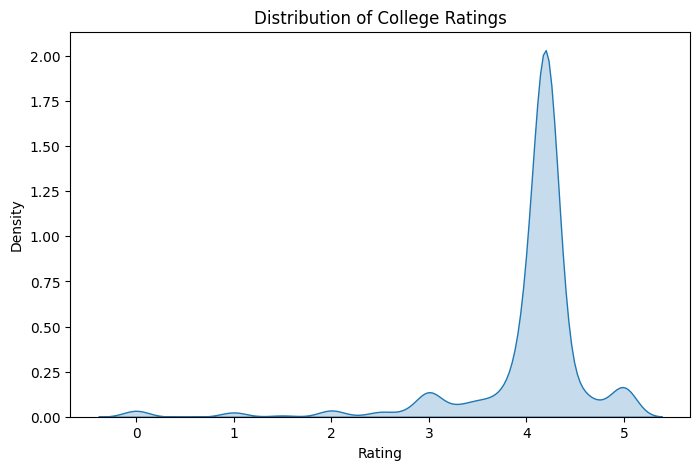

In [42]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['rating'], fill=True)
plt.xlabel("Rating")
plt.ylabel("Density")
plt.title("Distribution of College Ratings")
plt.show()

- Most colleges have ratings around **4.0 to 4.2**.  
- Very few colleges have ratings below **3**.  
- Ratings are closely clustered, showing limited variation.  
- Ratings alone may not strongly differentiate colleges.

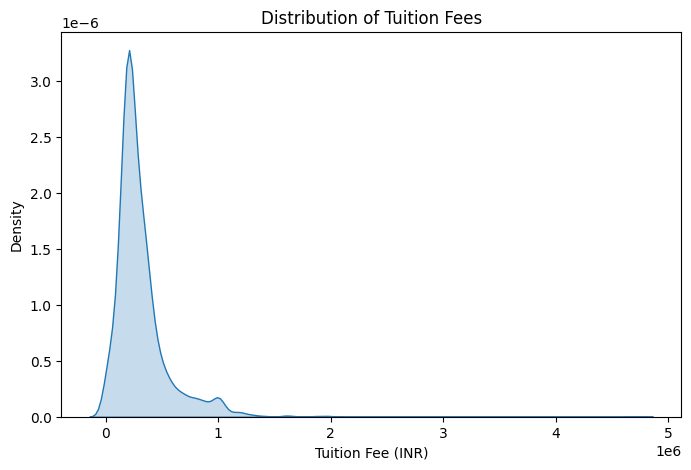

In [46]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['tution_fee'].dropna(), fill=True)
plt.xlabel("Tuition Fee (INR)")
plt.ylabel("Density")
plt.title("Distribution of Tuition Fees")
plt.show()

- Tuition fees are **highly right-skewed**.  
- Most colleges have **low to moderate fees**.  
- A small number of colleges charge **very high fees**, forming a long right tail.  
- This shows a **large variation in fee structure** across colleges.

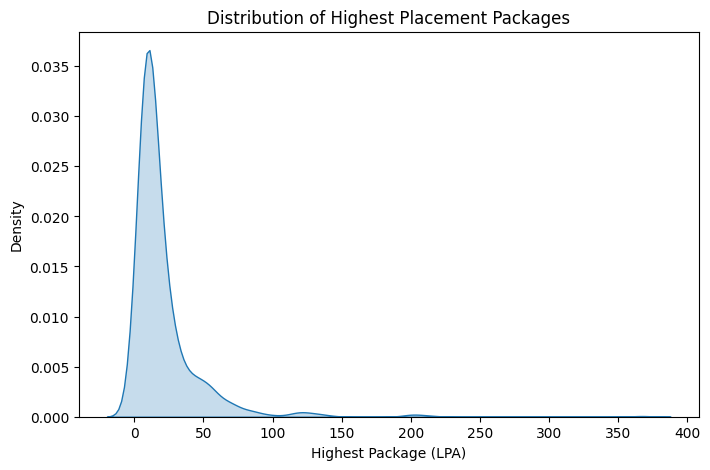

In [48]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['highest_package'].dropna(), fill=True)
plt.xlabel("Highest Package (LPA)")
plt.ylabel("Density")
plt.title("Distribution of Highest Placement Packages")
plt.show()

- The distribution is **highly right-skewed**.  
- Most colleges offer **lower to moderate highest packages**.  
- A few colleges report **very high packages**, creating a long right tail.  
- This indicates **large variation in placement outcomes** across colleges.

### Categorical

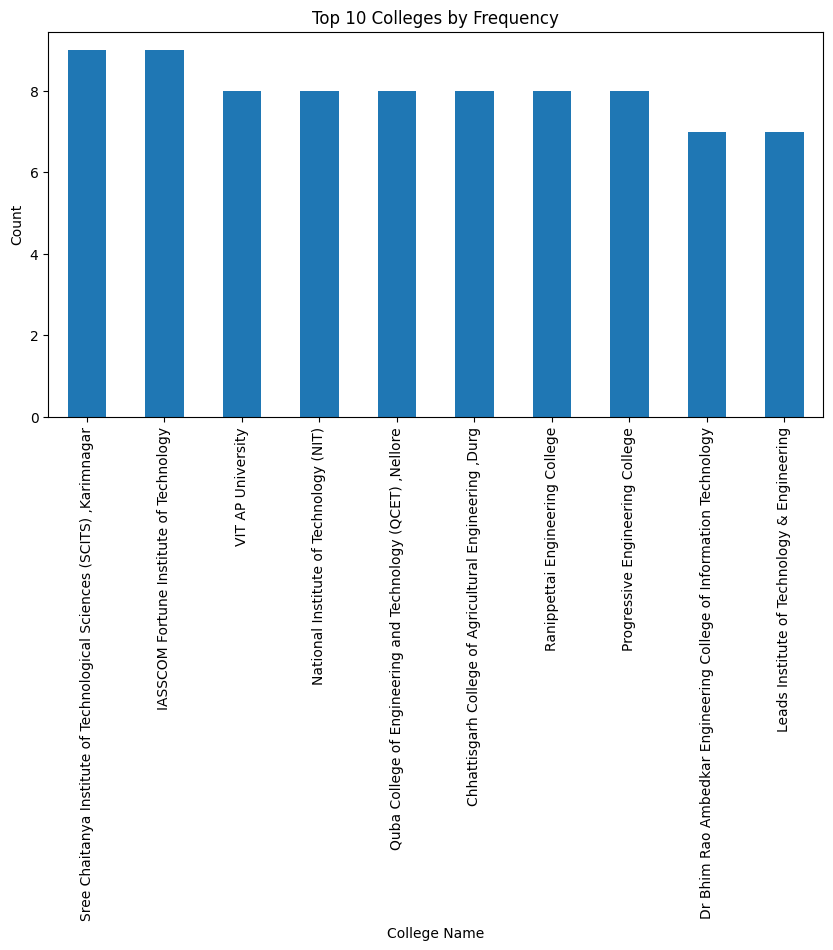

In [22]:
plt.figure(figsize=(10,5))
df['college_name'].value_counts().head(10).plot(kind='bar')
plt.xlabel("College Name")
plt.ylabel("Count")
plt.title("Top 10 Colleges by Frequency")
plt.show()

- The bar chart shows the **top 10 colleges appearing most frequently** in the dataset.
- The frequency values are **very close to each other**, indicating no single college dominates the data.
- This confirms that the dataset is **well distributed** and not biased toward a specific college.
- Most colleges appear only a limited number of times, supporting data diversity.

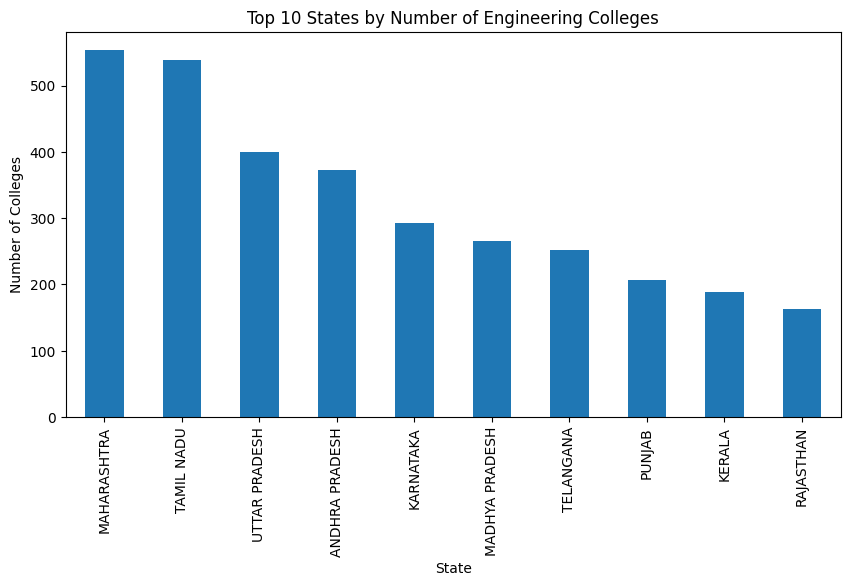

In [43]:
plt.figure(figsize=(10,5))
df['location'].value_counts().head(10).plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Number of Colleges")
plt.title("Top 10 States by Number of Engineering Colleges")
plt.show()

- Maharashtra and Tamil Nadu have the **highest number of engineering colleges**.
- States like Uttar Pradesh and Andhra Pradesh also show a **large concentration of colleges**.
- Southern and western states dominate the list, indicating **regional clustering of engineering institutions**.
- This suggests that location plays an important role in the availability of engineering education.

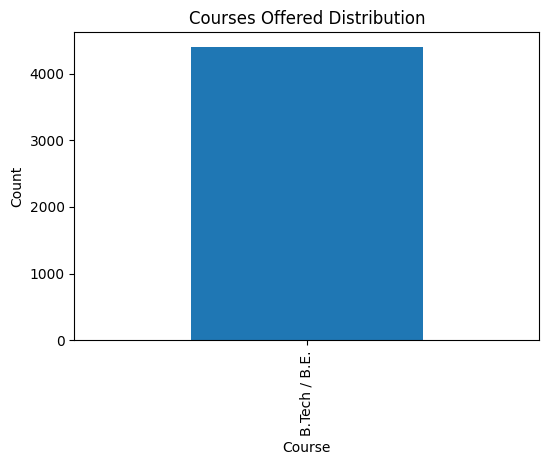

In [44]:
plt.figure(figsize=(6,4))
df['courses_offered'].value_counts().plot(kind='bar')
plt.xlabel("Course")
plt.ylabel("Count")
plt.title("Courses Offered Distribution")
plt.show()

- The chart shows that **all colleges offer B.Tech / B.E. programs**.
- This confirms that the dataset is **focused exclusively on engineering colleges**.
- Since there is no variation in this column, it **does not contribute to differentiation** in further analysis.

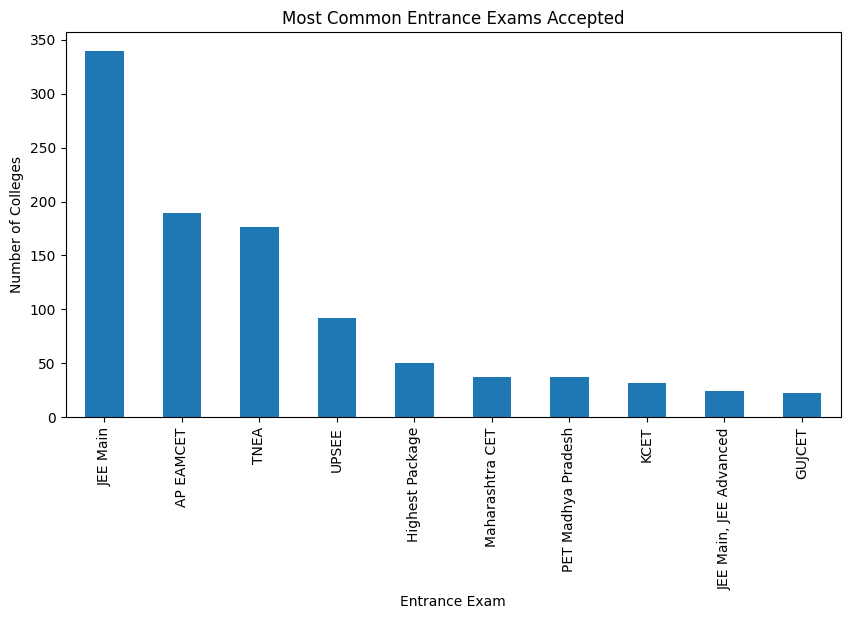

In [47]:
plt.figure(figsize=(10,5))
df['exams_accepted'].value_counts().head(10).plot(kind='bar')
plt.xlabel("Entrance Exam")
plt.ylabel("Number of Colleges")
plt.title("Most Common Entrance Exams Accepted")
plt.show()

- **JEE Main** is the most commonly accepted entrance exam across colleges.
- State-level exams such as **AP EAMCET** and **TNEA** are also widely accepted.
- Fewer colleges accept specialized or less common exams.
- This shows that national and state-level entrance exams dominate the admission process.

# Bi Variate Analysis

### Tuition Fee vs Highest Package

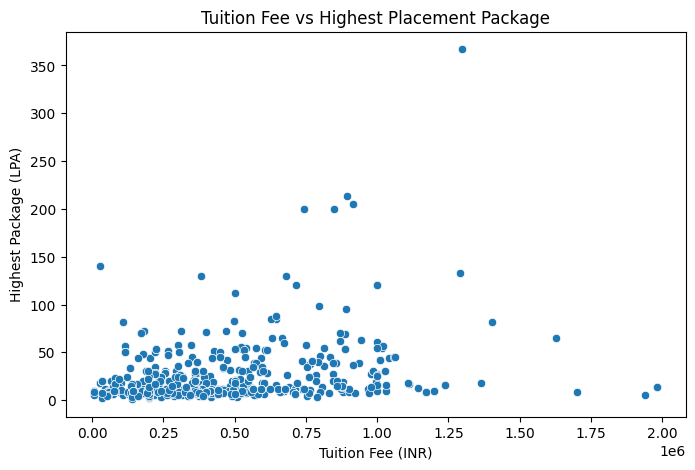

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df['tution_fee'],
    y=df['highest_package']
)
plt.xlabel("Tuition Fee (INR)")
plt.ylabel("Highest Package (LPA)")
plt.title("Tuition Fee vs Highest Placement Package")
plt.show()

- There is **no strong linear relationship** between tuition fee and highest placement package.
- Several colleges with **moderate or low fees** offer **high placement packages**.
- Some **high-fee colleges** do not necessarily provide better placements.
- A few **extreme outliers** show very high packages, but they are rare.
- Overall, this indicates that **paying higher fees does not always guarantee better placement outcomes**.

### Rating vs Tuition Fee

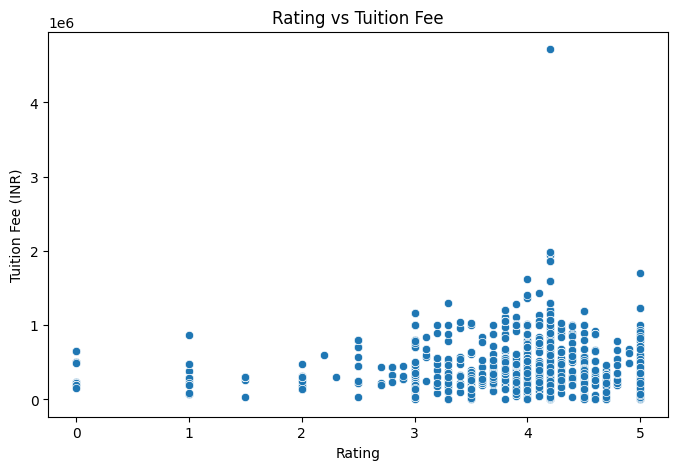

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df['rating'],
    y=df['tution_fee']
)
plt.xlabel("Rating")
plt.ylabel("Tuition Fee (INR)")
plt.title("Rating vs Tuition Fee")
plt.show()

- Tuition fees are **spread across all rating levels**, especially between ratings **3.5 to 5**.
- Higher ratings **do not consistently correspond** to higher tuition fees.
- Many colleges with **similar ratings charge very different fees**.
- A few **high-fee outliers** exist, but they are not driven by ratings alone.
- This shows that **college ratings are not a reliable indicator of tuition cost**.

### Rating vs Highest Placement Package

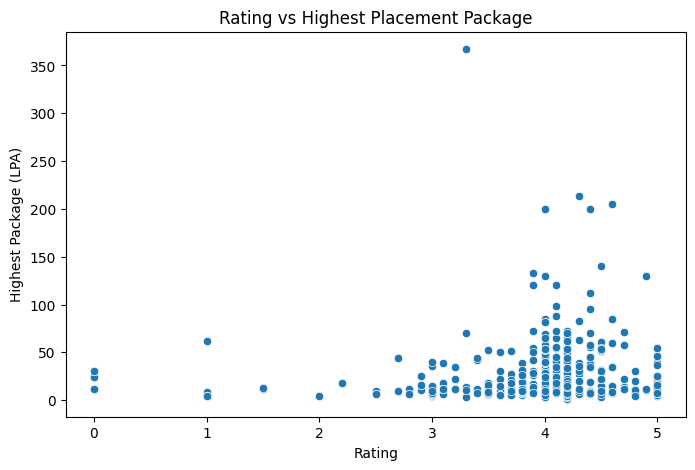

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df['rating'],
    y=df['highest_package']
)
plt.xlabel("Rating")
plt.ylabel("Highest Package (LPA)")
plt.title("Rating vs Highest Placement Package")
plt.show()

- Higher ratings **do not guarantee** higher placement packages.
- Most colleges, even with ratings around **4–5**, have placement packages clustered below **₹30 LPA**.
- A few **extreme outliers** (₹100+ LPA) exist but are **rare and not rating-driven**.
- Colleges with **lower ratings** can still offer decent placement packages.

### State-wise Tuition Fee Distribution (Top 10 States)

C:\Users\USER\AppData\Local\Temp\ipykernel_21352\1076111136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


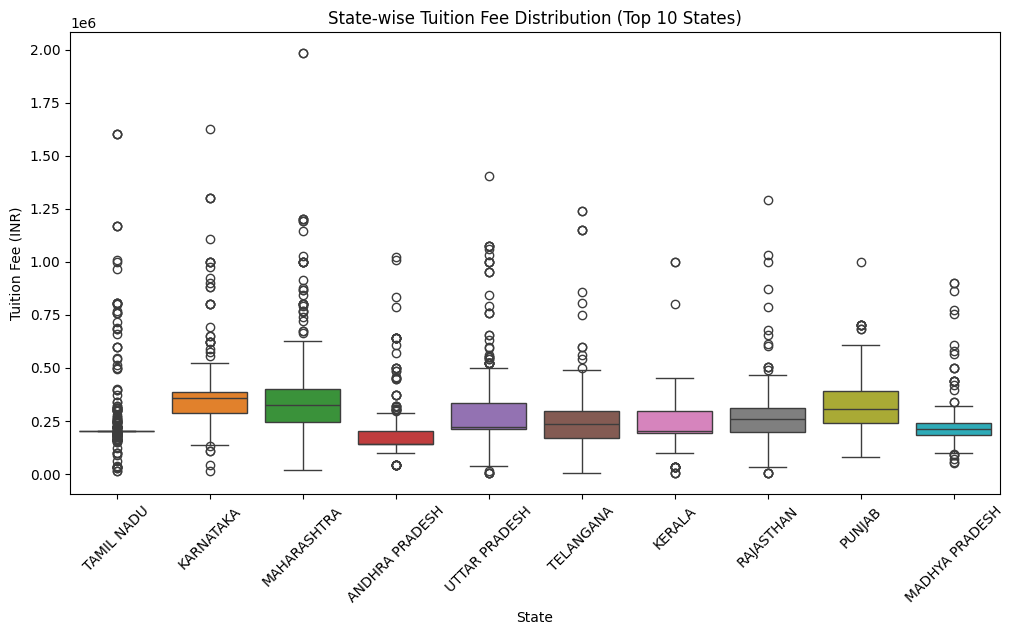

In [30]:
top_states = df['location'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.boxplot(
    x='location',
    y='tution_fee',
    palette='tab10',
    data=df[df['location'].isin(top_states)]
)
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Tuition Fee (INR)")
plt.title("State-wise Tuition Fee Distribution (Top 10 States)")
plt.show()

- Tuition fees **vary significantly across states**, indicating strong location-based pricing differences.
- **Karnataka, Maharashtra, Tamil Nadu, and Punjab** show **higher median tuition fees**, suggesting a higher concentration of private or premium institutions.
- **Andhra Pradesh and Madhya Pradesh** have **lower median fees**, making them more affordable for cost-sensitive students.
- Almost all states contain **high-fee outliers**, showing the presence of a few expensive colleges even in generally affordable regions.
- The **wide spread** in states like Maharashtra and Karnataka indicates **mixed options** ranging from budget to premium colleges.

### State-wise Highest Package Distribution (Top 10 States)

C:\Users\USER\AppData\Local\Temp\ipykernel_21352\1014313451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


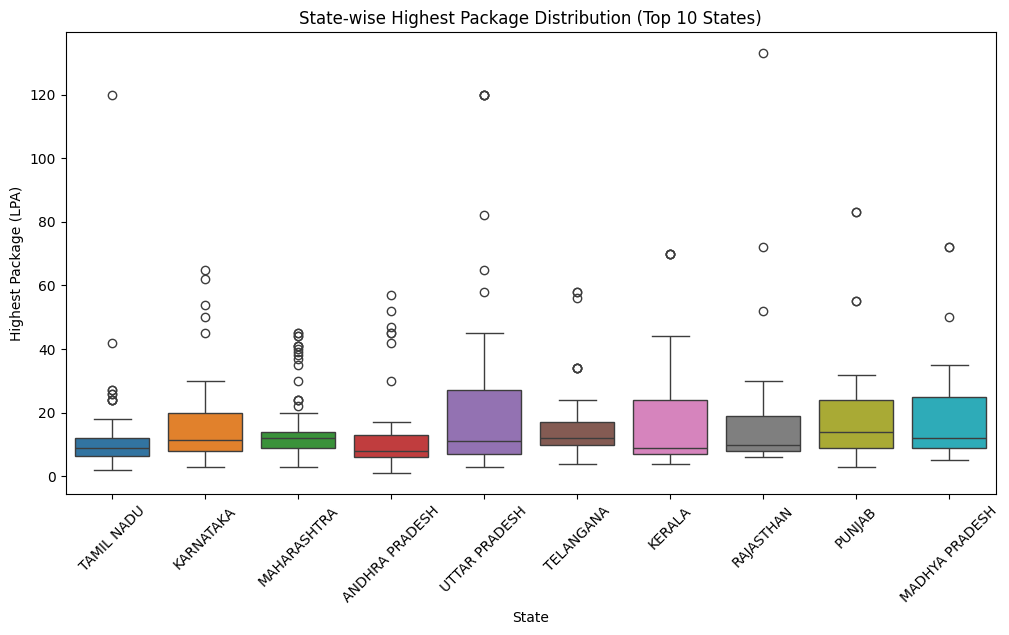

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(
    x='location',
    y='highest_package',
    palette='tab10',
    data=df[df['location'].isin(top_states)]
)
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Highest Package (LPA)")
plt.title("State-wise Highest Package Distribution (Top 10 States)")
plt.show()

- **Highest placement packages vary widely across states**, showing strong regional differences in top-end opportunities.
- **Karnataka, Maharashtra, Uttar Pradesh, Punjab, and Rajasthan** show **higher outliers**, indicating the presence of a few colleges with very strong placement records.
- **Median highest packages across most states are relatively similar**, generally in the **₹8–15 LPA** range.
- States like **Kerala and Andhra Pradesh** show **moderate medians with fewer extreme outliers**, suggesting more consistent but less extreme outcomes.
- The presence of **high outliers in almost every state** indicates that **excellent placements are not limited to a single region**.

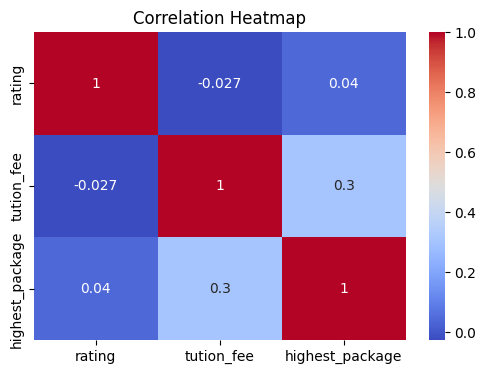

In [54]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['rating','tution_fee','highest_package']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()

- **Tuition Fee vs Highest Package (≈ 0.30)**  
  - Shows a **moderate positive correlation**.  
  - Colleges with higher fees *tend* to offer higher placement packages, but the relationship is **not strong**.

- **Rating vs Tuition Fee (≈ -0.03)**  
  - **Almost no correlation**.  
  - Higher-rated colleges do **not necessarily charge higher fees**.

- **Rating vs Highest Package (≈ 0.04)**  
  - **Very weak correlation**.  
  - College ratings do **not reliably indicate better placement outcomes**.

In [62]:
from scipy.stats import f_oneway

df_anova = df[['tution_fee', 'highest_package']].dropna()

median_fee = df_anova['tution_fee'].median()

low_fee = df_anova[df_anova['tution_fee'] <= median_fee]['highest_package']
high_fee = df_anova[df_anova['tution_fee'] > median_fee]['highest_package']

f_stat, p_value = f_oneway(low_fee, high_fee)

print("ANOVA p-value:", p_value)

if p_value < 0.05:
    print("Reject H₀ → Fee significantly affects placement")
else:
    print("Fail to reject H₀ → Paying higher fees is not always worth it")

ANOVA p-value: 5.015349991368659e-09
Reject H₀ → Fee significantly affects placement


In [63]:
from scipy.stats import f_oneway

df_anova = df[['rating', 'highest_package']].dropna()

low = df_anova[df_anova['rating'] < 4]['highest_package']
medium = df_anova[(df_anova['rating'] >= 4) & (df_anova['rating'] < 4.5)]['highest_package']
high = df_anova[df_anova['rating'] >= 4.5]['highest_package']

f_stat, p_value = f_oneway(low, medium, high)

print("ANOVA p-value:", p_value)

if p_value < 0.05:
    print("Reject H₀ → Rating affects placement")
else:
    print("Fail to reject H₀ → Top-rated colleges do not always give better placements")

ANOVA p-value: 0.5654828897539449
Fail to reject H₀ → Top-rated colleges do not always give better placements


In [64]:
from scipy.stats import f_oneway

top_states = df['location'].value_counts().head(5).index
df_anova = df[df['location'].isin(top_states)][['location', 'highest_package']].dropna()

groups = [
    df_anova[df_anova['location'] == state]['highest_package']
    for state in top_states
]

f_stat, p_value = f_oneway(*groups)

print("ANOVA p-value:", p_value)

if p_value < 0.05:
    print("Reject H₀ → Placement varies by location")
else:
    print("Fail to reject H₀ → No significant location effect")

ANOVA p-value: 0.0030483598796031707
Reject H₀ → Placement varies by location


In [65]:
from scipy.stats import f_oneway

median_fee = df['tution_fee'].median()

groups = [
    df[df['tution_fee'] <= median_fee]['highest_package'].dropna(),
    df[df['tution_fee'] > median_fee]['highest_package'].dropna()
]

f_stat, p_value = f_oneway(*groups)

print("ANOVA p-value:", p_value)

if p_value < 0.05:
    print("Reject H₀ → Affordable colleges can offer strong placements")
else:
    print("Fail to reject H₀ → No strong difference found")

ANOVA p-value: 7.061335708890336e-05
Reject H₀ → Affordable colleges can offer strong placements


## ==> **What I Observed**

### Tuition Fee Analysis
- Tuition fee distribution is **highly right-skewed**
- A few colleges with **very high fees (₹30–₹45 lakhs)** pull the mean upward
- **Median fee ≈ ₹2.4 lakhs**, while **mean fee ≈ ₹3.12 lakhs**

### Interpretation
- Most students enroll in **low to mid-fee colleges**
- Mean fee is misleading due to a small number of premium institutions

---

## ==> **Business Insight for Ravi (Student)**

- Paying very high fees is **NOT the norm**
- Ravi should focus on the **median fee range**, not premium extremes

---

## ==> **Placement Package Analysis**

### What I Observed
- Highest package distribution is **extremely right-skewed**
- A few elite colleges report **very high packages (100+ LPA)**
- Most colleges offer **moderate highest packages**

### Interpretation
- Exceptional placement numbers belong to a **small subset of colleges**
- Average placement expectations should be **realistic**

---

## ==> **Business Insight for Ravi**

- Don’t choose a college based on **extreme placement figures**
- Focus on **consistent and realistic outcomes**

---

## ==> **Rating Analysis**

### What I Observed
- Most colleges have ratings between **4.0 and 4.2**
- Very little variation in ratings across colleges

### Interpretation
- Ratings are **closely clustered**
- Ratings alone do **not strongly differentiate colleges**

---

## ==> **Business Insight for Ravi**

- Higher-rated colleges are **not always better choices**
- Ratings should be a **secondary decision factor**

---

## ==> **Location Analysis**

### What I Observed
- States like **Tamil Nadu, Maharashtra, Karnataka, Andhra Pradesh** have a high number of colleges
- Fee and placement outcomes vary **within the same state**

### Interpretation
- Location influences availability but not guaranteed outcomes

---

## ==> **Business Insight for Ravi**

- Some states offer **better value-for-money colleges**
- Ravi should compare **fees vs placements within the same region**

---

## ==> **Bivariate & Multivariate EDA – Key Learnings**

### Tuition Fee vs Highest Package
**Visual Insight**
- Weak positive trend
- Several **low-fee colleges offer good placements**
- High-fee colleges do not always outperform

### Interpretation
- Fees increase **non-linearly**
- Beyond a point, higher fees offer **diminishing returns**

---

## ==> **Correlation Heatmap – What I Saw**

- Stronger correlation:
  - Tuition Fee ↔ Highest Package (weak–moderate)
- Weak correlation:
  - Rating ↔ Tuition Fee
  - Rating ↔ Highest Package

### Interpretation
- **Fees and placements are loosely related**
- Ratings are **not pricing or placement drivers**

---

## ==> **Final Business Insights (Answering Ravi’s Questions)**

**Is paying higher fees really worth it?**  
Mostly **NO**. Beyond a certain level, fee increase does not guarantee better placements.

**Do top-ranked colleges always give better placements?**  
**NO**. Ratings show weak correlation with placement outcomes.

**Which states offer better value-for-money colleges?**  
**Tamil Nadu, Maharashtra, Karnataka, Andhra Pradesh**.

**Are there affordable colleges with strong placements?**  
**YES**. Several mid-fee colleges provide competitive placements.

---

## ==> **Final Recommendation**

For value-conscious students like Ravi:

- Prefer **mid-range tuition fee colleges**
- Do not chase **extreme placement numbers**
- Compare **fees vs realistic placement outcomes**
- Use **ROI**, not rankings alone, for decision-making
